# Exploring the Data Space of the Space Data Explorers

## In this notebook we will use the Twitter API to explore the conversation happening on Twitter related to NASA and Space Apps.

In [1]:
import pandas as pd
import scipy as sp
import random as rdm
import requests  # better than the urllib libraries
import simplejson
from requests_oauthlib import OAuth1
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

import re
from nltk.tokenize import word_tokenize
from string import punctuation 
from nltk.corpus import stopwords 
from textblob import TextBlob
import heapq
from collections import Counter
from wordcloud import WordCloud
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import DBSCAN
from itertools import islice, chain
from IPython.display import Image
from IPython import display
import matplotlib.pylab as plt
%matplotlib inline
import pysal as ps
from pysal.contrib.viz import mapping as maps
from pylab import *

from pylab import rcParams
rcParams['figure.figsize'] = 12, 7

import sys
from twython import Twython
import os
from datetime import datetime


import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

### We need twitter credentials in order to use the API. For more info on how to obtain them go to https://developer.twitter.com/en/docs

In [3]:

#twitter_secrets.json.nogit
secrets = {"api_key": CONSUMER_KEY,
           "api_secret": CONSUMER_SECRET,
           "access_token": ACCESS_KEY,
           "access_token_secret": ACCESS_SECRET}

auth = OAuth1(
    secrets["api_key"],
    secrets["api_secret"],
    secrets["access_token"],
    secrets["access_token_secret"]
)

# Let's create a function to request the posts we are interested in.

In [6]:
#L = []

def tweet_generator():
    """ Generator that live streams tweets (see 'yield' keyword)"""
    stream = requests.post('https://stream.twitter.com/1.1/statuses/filter.json',
                           auth=auth, 
                           stream=True,
                           data={"track":["nasa", 
                                          #"@nasa",
                                          #"#nasa",
                                          "spaceapps"#, 
                                          #"spaceappschallenge"
                                         ]#, 
                                 #"languages":"en"#
                                })
    
    for line in stream.iter_lines():
        if not line:  # filter out keep-alive new lines
            continue
        tweet = simplejson.loads(line)
        if ('text' in tweet): # and ((tweet['coordinates']) or (tweet['place'])):
            L.append(tweet)
            yield tweet['text']

### Let's use that function to get a 1000 tweets!

In [404]:
c = 0
for tweet in islice(tweet_generator(), 1000):
    c += 1
    if c % 100 == 0:
        print('\n')
        print(c)
        print('\n')
    print(tweet)

@NASA @Astro_Christina @Astro_Jessica @Space_Station My astronaut is so inspired. https://t.co/65Lh27vaWr
RT @maarcos_go: a nasa tem que estudar o @VintageCulture https://t.co/dzZXSLx0u6
RT @HillaryClinton: When I was a little girl, I wrote to NASA and told them I dreamed of being an astronaut. 

They wrote back and said the…
RT @CarpeDonktum: On the list of "things that never happened" this ranks right up there with you becoming President. https://t.co/o3W41WMIOM
Hahahahaha... deep  breath......hahahahaha!! 

Did you see the latest load of bull? 😳

Killary said NASA wrote her… https://t.co/ceqFbTs3Mr
RT @SirHublife: They should have launched this bitch into space when they had the chance.

Thanks a lot NASA. https://t.co/AXqMDdXCWb
RT @HillaryClinton: When I was a little girl, I wrote to NASA and told them I dreamed of being an astronaut. 

They wrote back and said the…
@TJWalters16 @TipaOdiosa @El_Papageno @RstrixxX @NASA @Astro_Christina @Astro_Jessica Civilized world is a literary…

RT @HillaryClinton: When I was a little girl, I wrote to NASA and told them I dreamed of being an astronaut. 

They wrote back and said the…
RT @AlterPinoyBott: #Kantot ako ni #Daddy habang nasa work pa si Mommy... Follow me for more HOT VIDEOS of my #Libog #Sex-perience.🔥🍆🍑

#al…
Nasa Rome na akooo! 

Jk. Sa Goshen lang yan 😘

(c)@judslosito @ Goshen Resort and Hotel https://t.co/Q0Kv32iH5z
RT @HillaryClinton: When I was a little girl, I wrote to NASA and told them I dreamed of being an astronaut. 

They wrote back and said the…
RT @4AllSoulKind: BULLSHIT! 
Publish the letter. 
cc @POTUS #KAG https://t.co/RVq49TbOzo
RT @nytimes: 2 NASA astronauts, Christina Koch and Jessica Meir, completed the first all-female spacewalk on Friday. The walk lasted 7 hour…
RT @HillaryClinton: When I was a little girl, I wrote to NASA and told them I dreamed of being an astronaut. 

They wrote back and said the…
RT @nytimes: 2 NASA astronauts, Christina Koch and Jessica Meir, completed the first all-fema

RT @jondaly: Two women floating in space were forced to talk to a rapist. https://t.co/IAAXXUqpID
RT @menggalurks: Isa Pa With Feelings Review @Black_SheepPH 

#IsaPaFeelGoodWeekend
#MaineMendoza https://t.co/FqlFyKuBTx
RT @YahooNewsTopics: 【史上初 女性だけで宇宙遊泳】
https://t.co/cCr7GlnJNp

国際宇宙ステーションで18日、NASAの飛行士2人が、史上初の女性のみによる宇宙遊泳を行った。3月にも予定されていたが、サイズの合う宇宙服がそろわず実施さ…
laging ikaw nasa panaginip ko
RT @SirHublife: They should have launched this bitch into space when they had the chance.

Thanks a lot NASA. https://t.co/AXqMDdXCWb
RT @osodorna: iyak count ko sa isa pa with feelings: tatlo*

* isa nasa first 15 minutes ng palabas TAMA HO BA IYON pabiglang atake ahmpuht…
RT @Karnagemvp: JE CHIALE LES RÉPONSES 😭😭😭😭😭 https://t.co/1VRgmU5lej
RT @GuyChicago5151: .@HillaryClinton Show US the letter, you know you didn’t write NASA and you know you never received a letter that said…
RT @nytimes: 2 NASA astronauts, Christina Koch and Jessica Meir, completed the first all-female spacewalk on Friday. The walk

NASA Is About to Conduct Its First All-Female Spacewalk https://t.co/wWZIOr80oO
@rokro111 @scottb_CITY @Freedom4thekids @FlatEarthExpert @_Gravity_Man @PaleAleWitch1 @Xaquery1 @dtjaayne @Mctoon27… https://t.co/I2tZLB9s2S
RT @HillaryClinton: When I was a little girl, I wrote to NASA and told them I dreamed of being an astronaut. 

They wrote back and said the…
RT @catturd2: One time - at band camp! https://t.co/YZVvlBywgl
RT @HillaryClinton: When I was a little girl, I wrote to NASA and told them I dreamed of being an astronaut. 

They wrote back and said the…
RT @NASA: Today, history was made as @Astro_Jessica and @Astro_Christina successfully completed the first #AllWomanSpacewalk! For more than…
RT @HillaryClinton: When I was a little girl, I wrote to NASA and told them I dreamed of being an astronaut. 

They wrote back and said the…
RT @HillaryClinton: When I was a little girl, I wrote to NASA and told them I dreamed of being an astronaut. 

They wrote back and said the…
Bwiset ka!!

RT @YourMajo: Sana nasa tabi kita
RT @fabbrdn: Mdrrr y’a autant de poussière que sa sur la Lune ? https://t.co/OwcLlnZOZF
RT @pialicerio: Ang galing lang kasi, napafeel niyo sa amin yung pakiramdam ng isang deaf, ang hirap kapag ikaw yung nasa sitwasyon ni gali…
RT @darna817: Pansin ko lang. Ano yung nasa likod Paps? Yung may pa ilaw. May naalala lang ako. 🤟

BASTAHAPIKAHAPISYA

#ALDUBChangingLives…
RT @TaraForTrump: Hahahahaha... deep  breath......hahahahaha!! 

Did you see the latest load of bull? 😳

Killary said NASA wrote her &amp; said…
RT @AlterPinoyBott: #Kantot ako ni #Daddy habang nasa work pa si Mommy... Follow me for more HOT VIDEOS of my #Libog #Sex-perience.🔥🍆🍑

#al…
@HillaryClinton NASA didn’t take little girls, so Hillary showed them how.  Girls, boys, whatever Haiti had.  She t… https://t.co/98l30AYl0j
RT @NASA: Today, history was made as @Astro_Jessica and @Astro_Christina successfully completed the first #AllWomanSpacewalk! For more than…
@CCriadoPerez And if you are 

RT @amyklobuchar: A great day in history. This is why I've always been a strong advocate for women in STEM, passing legislation that encour…
RT @StrongIam: Qing Inang commercial to! Hahaha

Basahin nyo yung nasa baba. https://t.co/uIS21dSnjl
@httpsxjane nasa bahay ako e
RT @p_k_rogers: @HeatherIsTaken Now NASA cheated her. LET IT REST @HillaryClinton , PLEASE,LET IT REST
RT @aspiringinvntor: 🚀The💃 FIRST 💃ALL-FEMALE SPACEWALK👩🏽 is 👯👩🏽underway👭
what a week this has been for WOMEN! 

After that iconic photo of…
RT @Redtowel4: This right here is such a BS lie. https://t.co/DDGKy6wKDq
I call BULLSHIT 🚩 on this one. My mother also write a letter in '61 to NASA, but instead of being told "they don't… https://t.co/7jfnkuxfEq
RT @NASA: Today, history was made as @Astro_Jessica and @Astro_Christina successfully completed the first #AllWomanSpacewalk! For more than…
RT @HillaryClinton: When I was a little girl, I wrote to NASA and told them I dreamed of being an astronaut. 

They wrote back and s

Trump Speaks to NASA Astronauts During the First All-Women Spacewalk https://t.co/WQTSuWHzX2 via @epochtimes
RT @Tony__Heller: YouTube comment

"I’m literally petrified of climate change as I have anxiety disorder, it makes everything worse, I’ve t…
Women can do anything 🛰🌎👩🏻‍🚀
RT @StrongIam: Qing Inang commercial to! Hahaha

Basahin nyo yung nasa baba. https://t.co/uIS21dSnjl
RT @SirHublife: They should have launched this bitch into space when they had the chance.

Thanks a lot NASA. https://t.co/AXqMDdXCWb
RT @HillaryClinton: When I was a little girl, I wrote to NASA and told them I dreamed of being an astronaut. 

They wrote back and said the…
RT @aftab_sadiq: Top story: The first all-female spacewalk is underway - CNN https://t.co/PUk9uMMJEt, see more https://t.co/x6Al5Sg7rR
@HillaryClinton Looks like no one wants you Hills:  Bill, the Marines, those Bosnian snipers, NASA, the American pe… https://t.co/HMpBk5nGwB
RT @rommel_perillo: nasa bahay namin si aiya, lasing gareks ahhahahha

RT @ViceGandaLife: Nasa point nako ng buhay ko na ayaw ko na mag explain, if someone don't understand me, "okay" nalang sasabihin ko. If I…
RT @nytimes: 2 NASA astronauts, Christina Koch and Jessica Meir, completed the first all-female spacewalk on Friday. The walk lasted 7 hour…
RT @NASA: “You’re doing an incredible job,” says @POTUS to @Astro_Christina and @Astro_Jessica during today’s #AllWomanSpacewalk. Tune in t…
@RTLnieuws Nou ja, het waren wel twee zweverige types... of niet soms? #NASA
RT @StrongIam: Qing Inang commercial to! Hahaha

Basahin nyo yung nasa baba. https://t.co/uIS21dSnjl
This is “out of this world!” #FemalesinSTEM Astronauts Christina Koch and Jessica Meir successfully complete first… https://t.co/pTA9IEei6M
@HillaryClinton Sorry I don't believe that NASA wrote you that letter.
RT @osodorna: iyak count ko sa isa pa with feelings: tatlo*

* isa nasa first 15 minutes ng palabas TAMA HO BA IYON pabiglang atake ahmpuht…
RT @CarpeDonktum: On the list of "things that ne

RT @HillaryClinton: When I was a little girl, I wrote to NASA and told them I dreamed of being an astronaut. 

They wrote back and said the…
RT @HillaryClinton: When I was a little girl, I wrote to NASA and told them I dreamed of being an astronaut. 

They wrote back and said the…
RT @AteSolid: Pagdating ng Tanghali lahat ay nasa harap ng TV,,sa pag-asang si @EchoLangNaman sana ay magbabalik.
#PlsBringBackECHOsaEB 
@E…
RT @StrongIam: Qing Inang commercial to! Hahaha

Basahin nyo yung nasa baba. https://t.co/uIS21dSnjl
RT @StrongIam: Qing Inang commercial to! Hahaha

Basahin nyo yung nasa baba. https://t.co/uIS21dSnjl
pare nasa EK pala yung ben&amp;ben ngayon pare
RT @Phishie_Philly: @HillaryClinton O come on Hillary. Can’t you ever tell the truth. You wrote NASA demanding that they make you an astron…
RT @engyn243: Hillary Clinton: "When I was a little girl, I wrote to NASA and told them I dreamed of being an astronaut." 

"They wrote bac…
When the first NASA astronaut went into space 

RT @pvtjokerus: More sniper fire. https://t.co/tB5AKXUPVT
RT @SirHublife: They should have launched this bitch into space when they had the chance.

Thanks a lot NASA. https://t.co/AXqMDdXCWb
RT @ViceGandaLife: Nasa point nako ng buhay ko na ayaw ko na mag explain, if someone don't understand me, "okay" nalang sasabihin ko. If I…
RT @YAMYAMBoholOFC: To all admin bumababa tayo sa trendlist bawasan nyo muna ang pa games kanina lahat lng fresh tweets nasa top tayo

#MMK…
@NASA @Astro_Christina @Astro_Jessica @Space_Station It's not ALL women without a transwoman represented too.

#missionFail
RT @nytimes: 2 NASA astronauts, Christina Koch and Jessica Meir, completed the first all-female spacewalk on Friday. The walk lasted 7 hour…
RT @HillaryClinton: When I was a little girl, I wrote to NASA and told them I dreamed of being an astronaut. 

They wrote back and said the…
EU AMO ESSA TRACK DEMAAAAAAAAAAIS
RT @clairecmc: Why is she at this table? Get your kids out of the White House while the

RT @clairecmc: Why is she at this table? Get your kids out of the White House while they are “earning” 80+ million last year. And until you…
RT @clairecmc: Why is she at this table? Get your kids out of the White House while they are “earning” 80+ million last year. And until you…
bumisita kami sa bahay ampunan, tas may wall don na puro pics ng before and recent pics ng mga na-adopt na bata kas… https://t.co/PfVF0JZHfA
RT @NASA: Throughout spaceflight history, 14 women have completed spacewalks. Today, @Astro_Jessica brought that number up to 15 as she flo…
El motor helicoidal de la NASA que parece violar las leyes de la física https://t.co/7w7jIC7o1F vía @ABC_Ciencia
sem educação de tão bom esse set
yung wallpaper ko andito pa, pero yung nasa wallpaper ko wala na
YUH yuh yuh  #SweetenerWorldTour #SweetenerThankUNextTour #Arianators #NASA #Ariana #FakeSmile #7rings… https://t.co/sksNdLY5V1
RT @KamalaHarris: For the first time in our nation’s history, an all-female crew walked in space 

Γεννήθηκε το 1947.
Εγραψε γράμμα στη nasa όταν ήταν μικρό κοριτσακι επειδή ήθελε να γίνει αστροναύτης, λέει. 
Στα 5… https://t.co/ELTOWJBWlr
RT @pvtjokerus: More sniper fire. https://t.co/tB5AKXUPVT
RT @cnnbrk: Watch live: Two NASA astronauts conduct the first all-female spacewalk https://t.co/qE8XnSVQPe https://t.co/HPm8ofcO42
RT @SHEOpsTalent: After an unexpected need for a 🦷 extraction today we are finally settling in pain free to catch the replay!  #AllWomanSpa…
Excited to explore the #SpaceAppsUniverse and see what we can come up with! #SpaceApps https://t.co/SaIXve5rCV
RT @maarcos_go: a nasa tem que estudar o @VintageCulture https://t.co/dzZXSLx0u6
RT @AshTanInfinity: Atsaka, karamihan sa milkies nasa right side, tapos kayo nasa left, so paki explain? Siguradohin nyo kasi muna kung kam…
RT @bbcmundo: Dos astronautas mujeres en el espacio: la histórica caminata espacial de la NASA https://t.co/kuelyEQ4Y2
@NASA @MNightShyamalan @GloriaSteinem @TheEllenShow @TheView @justdemi @MTV @

ui potah si archie nasa pamp kahapon 😭
RT @ShuttleCDRKelly: There are three women making history on the #AllWomanSpacewalk team today, including my former crew member on STS-121,…
RT @nowthisnews: Meet Jessica Meir and Christina Koch, the history-making astronaut duo behind NASA’s first-ever all-women spacewalk 💪 http…
RT @nytimes: 2 NASA astronauts, Christina Koch and Jessica Meir, completed the first all-female spacewalk on Friday. The walk lasted 7 hour…
Sana all nasa korea HAHAHAHAH
@Celtics_PRam @nebnoj67 @MPlumstead @HillaryClinton Oh please of course Hillary was around then.  You are obviously… https://t.co/P9Me11AQTg
Yung nasa simbahan ka pero mura ka ng mura 😆
Hayop puro nobita at damulag nasa newsfeed ko
RT @NASA: Throughout spaceflight history, 14 women have completed spacewalks. Today, @Astro_Jessica brought that number up to 15 as she flo…
RT @ScienceConnect2: NASA astronauts complete repairs on historic spacewalk - https://t.co/0po3h9HfdF
RT @zuluagajorge: Todos estos loc

Saudadis
RT @HillaryClinton: When I was a little girl, I wrote to NASA and told them I dreamed of being an astronaut. 

They wrote back and said the…
@NBCNews @NBCNewsNow Nasa is liar
RT @Seeker: NASA astronauts Christina Koch and Jessica Meir just made history in the first ever all-women spacewalk—and it’s been a long ti…
@themamasagas @NASA @Astro_Christina @Astro_Jessica Cute
RT @fabbrdn: Mdrrr y’a autant de poussière que sa sur la Lune ? https://t.co/OwcLlnZOZF
RT @engyn243: Hillary Clinton: "When I was a little girl, I wrote to NASA and told them I dreamed of being an astronaut." 

"They wrote bac…
RT @HillaryClinton: When I was a little girl, I wrote to NASA and told them I dreamed of being an astronaut. 

They wrote back and said the…
RT @maarcos_go: a nasa tem que estudar o @VintageCulture https://t.co/dzZXSLx0u6
RT @HillaryClinton: When I was a little girl, I wrote to NASA and told them I dreamed of being an astronaut. 

They wrote back and said the…
NASA spacewalk: Space agen

### What data is there?

In [276]:
L[0]

{'created_at': 'Thu Oct 17 21:07:09 +0000 2019',
 'id': 1184938925703319552,
 'id_str': '1184938925703319552',
 'text': 'RT @riahfab: Ikaw na nasa bus/jeep na antok na antok na tapos sumakay si crush https://t.co/xEQcsLnUnH',
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'truncated': False,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 1002518687813754880,
  'id_str': '1002518687813754880',
  'name': 'amme',
  'screen_name': 'rhaeex',
  'location': "Jc's ❤🏳️\u200d🌈",
  'url': None,
  'description': 'Have Faith, Hope and Love 😇💕 || Astrophile ✨',
  'translator_type': 'none',
  'protected': False,
  'verified': False,
  'followers_count': 342,
  'friends_count': 520,
  'listed_count': 0,
  'favourites_count': 19843,
  'statuses_count': 11750,
  'created_at': 'Fri Jun 01 11:54:15 +0000 2018',
  'utc_offs

### Lets now extract some information from each tweet and save it in a dataframe.

In [438]:
df = pd.DataFrame()

In [439]:
k = 0
for el in L:
    try:
        temp = pd.DataFrame([[el['text'], el['lang'], 
                              el['coordinates'], el['place'],
                              #np.array(el['place']['bounding_box']['coordinates'][0]).mean(axis=0)[0],
                              #np.array(el['place']['bounding_box']['coordinates'][0]).mean(axis=0)[1],
                              el['timestamp_ms'], 
                              el['created_at'], el['user']['location'], 
                              el['user']['description'], 
                              el['user']['screen_name'],
                              el
                             ]
                            ], 

                            columns=['text', 'lang', 
                                     'location', 'place',
                                     #'centroid_lat', 'centroid_lon',
                                     'timestamp',
                                     'created_at', 'user_location', 
                                     'user_description','screen_name', 'raw_data'])
        df = df.append(temp, ignore_index=True, sort=True)
    except:
        pass
df.tail()

,created_at,lang,location,place,raw_data,screen_name,text,timestamp,user_description,user_location
9993,Sat Oct 19 02:06:22 +0000 2019,en,None,None,{'created_at': 'Sat Oct 19 02:06:22 +0000 2019...,crystal4obama,"RT @HillaryClinton: When I was a little girl, ...",1571450782965,Delightfully flawed & wonderfully human. Twinj...,Internet
9994,Sat Oct 19 02:06:23 +0000 2019,tl,None,None,{'created_at': 'Sat Oct 19 02:06:23 +0000 2019...,eyyaaaang,RT @AngTanongKoSayo: Bakit parang mas nakakapa...,1571450783292,ᵢ ₐcₜᵤₐₗₗy fₑₗₗ fₒᵣ yₒᵤ bₑfₒᵣₑ ᵢ ₑᵥₑₙ ᵣₑₐₗᵢzₑd...,None
9995,Sat Oct 19 02:06:23 +0000 2019,en,None,"{'id': '27c45d804c777999', 'url': 'https://api...",{'created_at': 'Sat Oct 19 02:06:23 +0000 2019...,webology,@amyhoy I just heard about this a week(ish). A...,1571450783291,"Python, Django, Docker, Engineer, Partner at @...","Lawrence, KS"
9996,Sat Oct 19 02:06:23 +0000 2019,tl,None,None,{'created_at': 'Sat Oct 19 02:06:23 +0000 2019...,FrankiSangel,Ang bilis nasa ikalima na\n\n#FrankiAnaBetterT...,1571450783558,MacarenaAchagaIsTheLoveOfmyLife💜JuliantinaXFra...,Republic of the Philippines
9997,Sat Oct 19 02:06:24 +0000 2019,en,None,None,{'created_at': 'Sat Oct 19 02:06:24 +0000 2019...,William34908661,@amyklobuchar @NASA Why do we want to go back ...,1571450784077,Served in the u.s army for 20 yrs police reser...,Mankato mn


In [440]:
df.shape

(9998, 10)

In [92]:
def clean_tweet(tweet): 
    ''' 
    Utility function to clean tweet text by removing links, special characters 
    using simple regex statements. 
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split()) 

def get_tweet_sentiment(tweet): 
    ''' 
    Utility function to classify sentiment of passed tweet 
    using textblob's sentiment method 
    '''
    # create TextBlob object of passed tweet text 
    analysis = TextBlob(clean_tweet(tweet)) 
    # set sentiment 
    return analysis.sentiment.polarity

In [441]:
df['sentiment'] = df.apply(lambda x: get_tweet_sentiment(x['text']), 1)

In [442]:
df['sentiment'].mean()

0.07680952691861226

In [443]:
df[df['text'].str.contains('nasa')]['sentiment'].mean()

0.06420426455406694

In [444]:
df[df['text'].str.contains('spaceapps')]['sentiment'].mean()

0.15625

In [445]:
df[df['text'].str.contains('spaceapps')]

,created_at,lang,location,place,raw_data,screen_name,text,timestamp,user_description,user_location,sentiment
339,Thu Oct 17 21:12:04 +0000 2019,en,None,None,{'created_at': 'Thu Oct 17 21:12:04 +0000 2019...,joespens,RT @spaceappsnyc: T-36 hours until the hacking...,1571346724610,executive director @spaceappsnyc • systems arc...,"Harrison, NY",0.0000
1629,Thu Oct 17 23:19:50 +0000 2019,en,None,None,{'created_at': 'Thu Oct 17 23:19:50 +0000 2019...,sadukie,Tonight's goals - Carmen Sandiego with the kid...,1571354390592,"Wife to an IT guy, Mom, Developer Technologies...",Northeast Ohio,0.2000
1813,Thu Oct 17 23:23:30 +0000 2019,en,None,"{'id': '01a9a39529b27f36', 'url': 'https://api...",{'created_at': 'Thu Oct 17 23:23:30 +0000 2019...,nwhysel,I’m mentoring at NASA Space Apps NYC at the Ex...,1571354610530,"Co-Chair #IAC20, COO @DecisionFish #bestforNYC...","New York, NY",0.0000
3306,Fri Oct 18 10:42:24 +0000 2019,en,None,None,{'created_at': 'Fri Oct 18 10:42:24 +0000 2019...,sos_jr,@sadukie @spaceappsCLE 🎶”Tonight is going to b...,1571395344669,"Interests: https://t.co/ahHmS93CLo, Website De...","Cleveland, Ohio",0.7000
5485,Fri Oct 18 18:57:51 +0000 2019,en,None,None,{'created_at': 'Fri Oct 18 18:57:51 +0000 2019...,_DEVince,I took this least y'all could do is tag me 😏\...,1571425071825,CS undergrad | Frontend webdeveloper | 🏀Balle...,None,0.1000
6145,Fri Oct 18 19:31:29 +0000 2019,en,None,None,{'created_at': 'Fri Oct 18 19:31:29 +0000 2019...,coderinheels,RT @PaulaLKennedy: Fantastic turnout for the @...,1571427089174,Founder @TECHKNOWDay | Ambassador #Google @Wom...,London,0.4000
6732,Fri Oct 18 19:34:31 +0000 2019,es,None,None,{'created_at': 'Fri Oct 18 19:34:31 +0000 2019...,Francisco_gmd,Ha sido un orgullo poder volver a dar la bienv...,1571427271434,What we do in life echoes in eternity. Talent&...,Spain,0.0000
6857,Fri Oct 18 19:35:06 +0000 2019,es,None,None,{'created_at': 'Fri Oct 18 19:35:06 +0000 2019...,juanli995,RT @spaceappsalm: @juanli995 nos explica los 2...,1571427306450,Entrepreneur🚀& Engineer🛠️ •\nThailō Bags🌱🎒🇳🇵 •...,"📍 Almería, Spain 🏖️🏜️",0.0000
6882,Fri Oct 18 19:35:11 +0000 2019,es,None,None,{'created_at': 'Fri Oct 18 19:35:11 +0000 2019...,USembassyMadrid,RT @Francisco_gmd: Ha sido un orgullo poder vo...,1571427311949,Embassy of the U.S. in Madrid. Embajada de EE....,Madrid,0.0000
7025,Fri Oct 18 19:35:55 +0000 2019,en,None,None,{'created_at': 'Fri Oct 18 19:35:55 +0000 2019...,propelland,RT @JGonTW: Full house for NASA #SpaceAppsMadr...,1571427355659,propelland is a global strategic design & engi...,"San Francisco, Madrid, Mexico",0.3500


In [446]:
df['created_at'] = pd.to_datetime(df['created_at'])

In [451]:
dfS = df[['created_at', 'sentiment']].groupby('created_at')['sentiment'].mean().reset_index()
#dfS['color'] = dfS.apply(lambda x: 'g' if x['sentiment'] >= 0 else 'r', 1)
dfS.head()

,created_at,sentiment
0,2019-10-17 21:07:09,0.068182
1,2019-10-17 21:07:10,0.000000
2,2019-10-17 21:07:11,0.325000
3,2019-10-17 21:07:12,0.000000
4,2019-10-17 21:07:13,0.068182


In [452]:
dfS = dfS.set_index('created_at')
dfS.head()

,sentiment
created_at,
2019-10-17 21:07:09,0.068182
2019-10-17 21:07:10,0.000000
2019-10-17 21:07:11,0.325000
2019-10-17 21:07:12,0.000000
2019-10-17 21:07:13,0.068182


In [453]:
#dfS.sentiment.max()

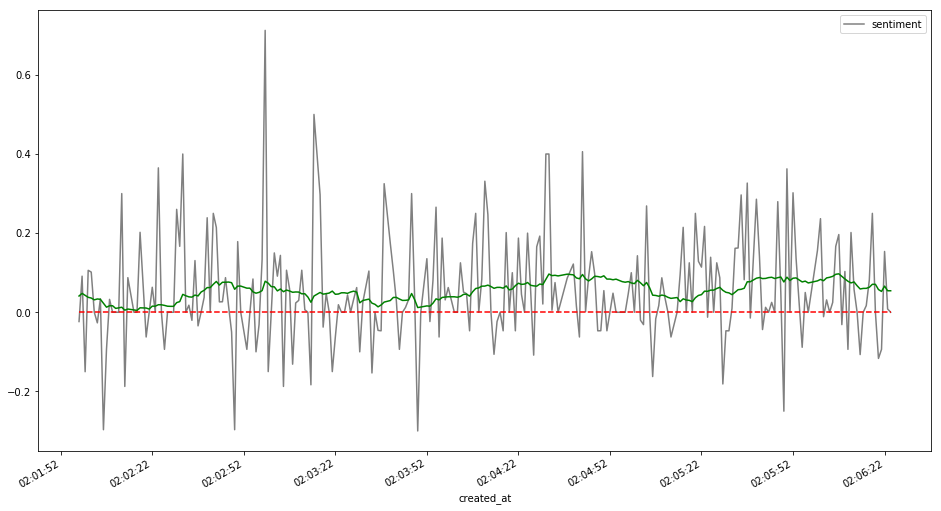

In [454]:
rcParams['figure.figsize'] = 16, 9

dfS[-250:].plot(kind='line', color='grey')

ax1 = dfS['sentiment'].rolling(30, min_periods=1).mean()[-250:].plot(kind='line', color='g')
plt.plot(dfS.index[-250:], [0]*len(dfS.index[-250:]), '--r')

In [104]:
stop = set(stopwords.words('english'))  # predefined list of "uninteresting" words

counter = Counter()

def nlargest(n, word_scores):
    """ Wrapper around heapq to return the n words with the largest count."""
    # word_scores: index 0=>word, 1=>count
    return heapq.nlargest(n, word_scores, key=lambda x: x[1])

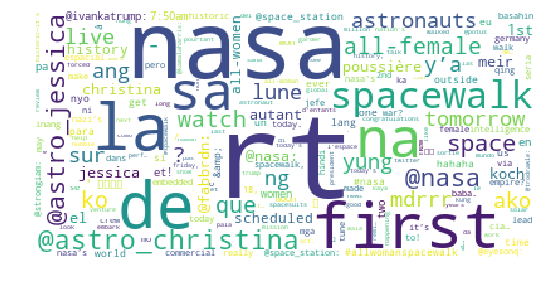

In [455]:
rcParams['figure.figsize'] = 9, 6
DISPLAY_EVERY = 100

try:
    for k in range(len(L)):
        try:
            tweet = L[k]['text']
            for word in tweet.lower().split():
                if word not in stop and 'http' not in word:
                    counter[word] += 1
            if k % DISPLAY_EVERY == (DISPLAY_EVERY - 1):
                wordcloud = WordCloud(background_color='white'#, collocations=False #, 
                                      #width=1600, height=800
                                     ).fit_words(counter)
                plt.axis("off")
                display.clear_output(wait=True)
                plt.imshow(wordcloud)
                display.display(plt.gcf())
        except:
            pass
    display.clear_output(wait=True)
except KeyboardInterrupt:
    pass

In [456]:
nlargest(10, counter.items())

[('rt', 26139),
 ('nasa', 14752),
 ('de', 5473),
 ('la', 5413),
 ('first', 5130),
 ('na', 3812),
 ('sa', 3712),
 ('spacewalk', 3468),
 ('@astro_christina', 3264),
 ('@astro_jessica', 2939)]

In [457]:
#L = [x for x in L if x]

In [458]:
#Collect only the tweets
T = []
for tweet in L:
    T.append(tweet['text'])

In [459]:
BATCH_SIZE = 102
CLUSTER_SIZE = 6

kmeans = MiniBatchKMeans(n_clusters=CLUSTER_SIZE)

def batch(iterable, size):
    """ batch("ABCDEFG", 3) -> ABC DEF G """
    sourceiter = iter(iterable)
    while True:
        batchiter = islice(sourceiter, size)
        yield chain([next(batchiter)], batchiter)

In [460]:
with open("dictnostops.txt") as fh:
    words = [line.strip() for line in fh.readlines()]
    word_to_index = { word: k for k, word in enumerate(words) }

In [461]:
def wordclouds(wordcounts):
    wordclouds = [WordCloud().fit_words(Counter({k:v for (k,v) in dict(counts).items() if v > 0})) for counts in wordcounts]
    fig, axes = plt.subplots(2,2)
    display.clear_output(wait=True)
    for k, (ax, wordcloud) in enumerate(zip(axes.flatten(), wordclouds)):
        ax.axis("off")
        ax.imshow(wordcloud)
        ax.set_title("Topic %d" % k)
    display.display(fig)
    fig.clear()

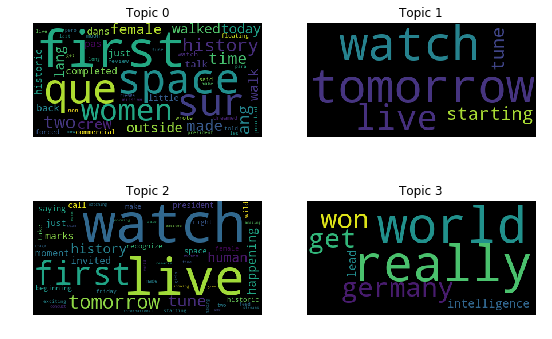

/Users/Nel/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: generator 'batch' raised StopIteration
  from ipykernel import kernelapp as app


<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

In [462]:
try:
    for tweets in batch(T, BATCH_SIZE):
        mat = sp.sparse.dok_matrix((BATCH_SIZE, len(words)))
        for row, tweet in enumerate(tweets):
            for word in tweet.lower().split():
                if word in word_to_index:
                    mat[row, word_to_index[word]] = 1.
        kmeans.partial_fit(mat.tocsr())
        wordcounts = [nlargest(50, zip(words, kmeans.cluster_centers_[i])) for i in range(kmeans.n_clusters)]
        wordclouds(wordcounts)
except:
    pass

In [463]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['user_description'].dropna())

In [464]:
#svd = TruncatedSVD(n_components=100, n_iter=7, random_state=42)

In [465]:
X.shape

(8317, 24424)

In [466]:
#X1 = svd.fit_transform(X)

In [467]:
#print(svd.explained_variance_ratio_) 

In [468]:
#print(svd.explained_variance_ratio_.sum())

In [469]:
#print(svd.singular_values_)

In [473]:
dfDBS = df['user_description'].dropna().reset_index()

In [490]:
clustering = DBSCAN(eps=1.1, min_samples=10).fit(X)

In [491]:
dfDBS['dbscan'] = clustering.labels_

In [492]:
dfDBS[dfDBS['dbscan'] == -1]

,index,user_description,dbscan


In [385]:
dfDBS = pd.DataFrame(X1[:,:2], columns=['x', 'y'])[100:200]
dfDBS['text'] = df['text'][100:200]
dfDBS['dbscan'] = df['dbscan'][100:200]
dfDBS.head()

,x,y,text,dbscan
100,0.024172,0.020474,@Stephen90045069 @Matt_Clough @JamesRider3 @aS...,0
101,0.065091,0.003486,RT @usembassyMVD: 📢¿Todavía no te registraste ...,0
102,0.011106,0.105359,RT @NASA_Marshall: Spacesuits are useful for m...,0
103,0.016975,0.076805,RT @sayatttjaimeee: at\nsinong\ntanga\nang\nna...,7
104,0.006977,0.025343,RT @CecaPereca26: Nasa vojska je sve modernizo...,0


In [386]:
len(dfDBS['dbscan'].unique())


14

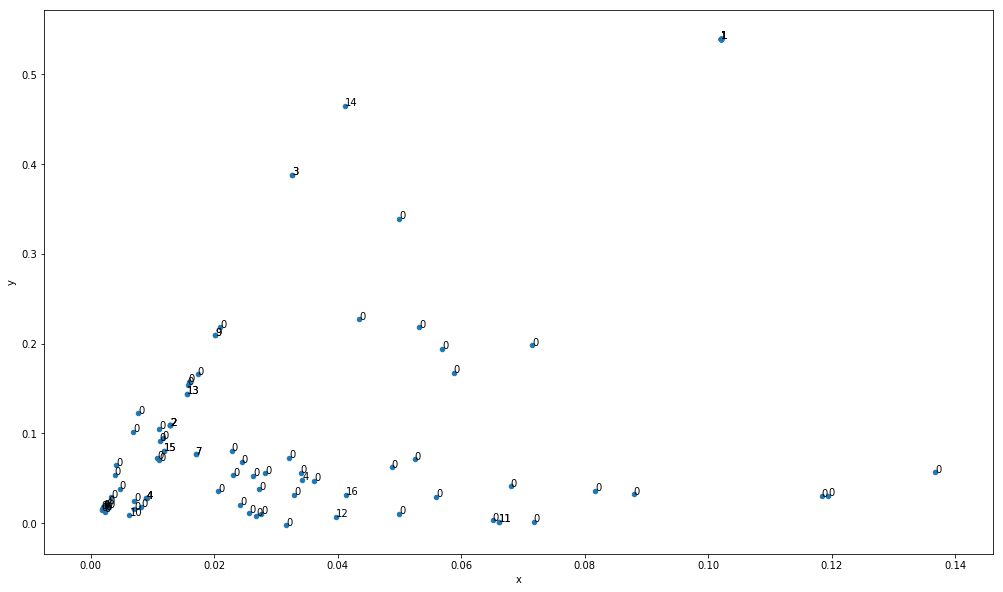

In [389]:
ax = dfDBS[['x','y']].plot.scatter(x='x', y='y')
for i, txt in enumerate(list(dfDBS['dbscan'])):
    ax.annotate(txt, (dfDBS['x'].loc[i+100], dfDBS['y'].loc[i+100]))

In [347]:
np.random.rand(3,)

array([ 0.46600021,  0.34850381,  0.42008035])

In [384]:
dfDBS

,x,y,screen_name,dbscan
100,0.024172,0.020474,OscarsWild1,0
101,0.065091,0.003486,_diaz_camila,0
102,0.011106,0.105359,Astronomy_Nerd,0
103,0.016975,0.076805,jalina0208,7
104,0.006977,0.025343,pravi_genije,0
105,0.102098,0.539620,cntch,1
106,0.032940,0.031657,MargaritaDelf17,0
107,0.032551,0.387804,temple_terrace,3
108,0.102098,0.539620,CandaceHagen1,1
109,0.027256,0.038191,maglioqueira,0


In [390]:
df[df['dbscan'] == 0]['text']

0       RT @riahfab: Ikaw na nasa bus/jeep na antok na...
2                   nasa panaginip nanaman kita kanina:))
4       NASA's Hubble Telescope Gives Best Look Yet at...
5       @SpideyChief Not to mention how NASA recently ...
6       RT @smart_whit: #TheTenCommandments it’s not f...
8       RT @wfryer: Getting ready for #STEAM night in ...
9       RT @elmundoes: La NASA ya tiene los trajes par...
10      RT @NASA_SLS: As NASA goes forward to the Moon...
11      RT @SmartTalentUY: #Agenda &gt;&gt;&gt; 🛰🚀 Est...
15      RT @apod: [RPT] Moons of Saturn: https://t.co/...
19      RT @SinEmbargoMX: Cámara de la NASA capta la m...
20      RT @NASA: 👋 @NASAInSight\n 👋 @MarsCuriosity\nT...
21      RT @weatherindia: . @NASA is planning to land ...
22      RT @scosh_svnit: NASA's Hubble Telescope Gives...
23      RT @NASAJPL: Ruptures in Ridgecrest\n \nUsing ...
24      Our very own Katelyn Hertel, (@Katers_Potaters...
25      RT @elgranqenk: Primer cometa interestelar cap...
27      NASA t

## Geospatial Analysis

## We extracted the location information from the tweets that had it so let's see how many did.

In [391]:
df.location.dropna()

1336    {'type': 'Point', 'coordinates': [112.72278627...
3457    {'type': 'Point', 'coordinates': [121.05386257...
6462    {'type': 'Point', 'coordinates': [-78.8962636,...
Name: location, dtype: object

In [392]:
#df = df.drop(3350, axis=0)

## That's not very promising. What else can we do to get geospatial information? We can look into the 'place' key.

In [393]:
df.place.dropna()

248     {'id': '3b77caf94bfc81fe', 'url': 'https://api...
249     {'id': '0087ad0f1b6dfcc8', 'url': 'https://api...
267     {'id': '3b77caf94bfc81fe', 'url': 'https://api...
313     {'id': '01516da6022dca08', 'url': 'https://api...
321     {'id': '521b6f591c4b3ce8', 'url': 'https://api...
377     {'id': '006523c50dfe9086', 'url': 'https://api...
459     {'id': '01e93ed535e05b29', 'url': 'https://api...
485     {'id': '013379ee5729a5e6', 'url': 'https://api...
661     {'id': '07d9ec9cc0086001', 'url': 'https://api...
778     {'id': '3797791ff9c0e4c6', 'url': 'https://api...
868     {'id': '01d7c74272e5eafe', 'url': 'https://api...
961     {'id': '5579f6b17e36847b', 'url': 'https://api...
1012    {'id': '003d47f62835a9f1', 'url': 'https://api...
1063    {'id': '00fc4c873d8a5e32', 'url': 'https://api...
1094    {'id': 'd6819fe60643ebc1', 'url': 'https://api...
1117    {'id': '4ec01c9dbc693497', 'url': 'https://api...
1155    {'id': '0fa65e5e6fbf3eb8', 'url': 'https://api...
1214    {'id':

In [394]:
df.place.loc[248]

{'id': '3b77caf94bfc81fe',
 'url': 'https://api.twitter.com/1.1/geo/id/3b77caf94bfc81fe.json',
 'place_type': 'city',
 'name': 'Los Angeles',
 'full_name': 'Los Angeles, CA',
 'country_code': 'US',
 'country': 'United States',
 'bounding_box': {'type': 'Polygon',
  'coordinates': [[[-118.668404, 33.704538],
    [-118.668404, 34.337041],
    [-118.155409, 34.337041],
    [-118.155409, 33.704538]]]},
 'attributes': {}}

## Not all tweets have a 'place' key but there are definitely more of those than with a location. Inside 'place' there are coordinates for a geographical bounding box so let's compute its centroid and use that as a point of reference for location.

In [396]:
df1 = df[['place', 'text']].dropna().reset_index()
df1['centroid_lat'] = df1.apply(lambda x: np.array(x['place']['bounding_box']['coordinates'][0]).mean(axis=0)[0], 1)
df1['centroid_lon'] = df1.apply(lambda x: np.array(x['place']['bounding_box']['coordinates'][0]).mean(axis=0)[1], 1)

df1 = df1.groupby(['centroid_lat', 'centroid_lon'])['text'].count().reset_index()
df1.columns = ['centroid_lat', 'centroid_lon', 'count']

#### What are the most common centroids?

In [397]:
df1.sort_values(by='count', ascending=False)

,centroid_lat,centroid_lon,count
33,-77.014398,38.898603,3
65,120.983987,14.591457,3
70,121.062736,14.683012,2
21,-83.804475,27.698682,2
44,-46.595546,-23.682803,2
53,24.830963,65.862802,2
38,-73.968542,40.780709,2
68,121.033212,14.546499,2
48,-3.703508,40.477795,2
4,-118.411907,34.020789,2


### Where are users located according to their bios?

In [398]:
df.groupby('user_location')['text'].count().sort_values(ascending=False)

user_location
United States                     122
Republic of the Philippines        77
Los Angeles, CA                    50
USA                                39
Paris, France                      36
France                             36
New York, NY                       36
Washington, DC                     35
California, USA                    34
Worldwide                          29
Venezuela                          26
Earth                              25
Florida, USA                       25
Texas, USA                         22
Philippines                        22
London, England                    21
Houston, TX                        21
Comunidad de Madrid, España        19
Ile-de-France, France              19
Chicago, IL                        18
India                              17
San Francisco, CA                  17
🇵🇭                                 16
Australia                          16
San Diego, CA                      16
Canada                             1

In [399]:
df['location'].dropna()

1336    {'type': 'Point', 'coordinates': [112.72278627...
3457    {'type': 'Point', 'coordinates': [121.05386257...
6462    {'type': 'Point', 'coordinates': [-78.8962636,...
Name: location, dtype: object

In [400]:
# Go through all tweets and add locations to 'coordinates' dictionary
coordinates = {'latitude': [], 'longitude': []}
for index, row in df.iterrows():
    try:
        
        #location = geolocator.geocode(user_loc)
        # If coordinates are found for location
        if row['location']['coordinates']:
            coordinates['latitude'].append(row['location']['coordinates'][0])
            coordinates['longitude'].append(row['location']['coordinates'][1])
            
    # If too many connection requests
    except:
        pass

In [401]:
coordinates

{'latitude': [112.72278627, 121.05386257, -78.8962636],
 'longitude': [-7.27586109, 14.62204492, 35.7372126]}

### Lets now map the information we have from tweet's location and bounding box centroids.

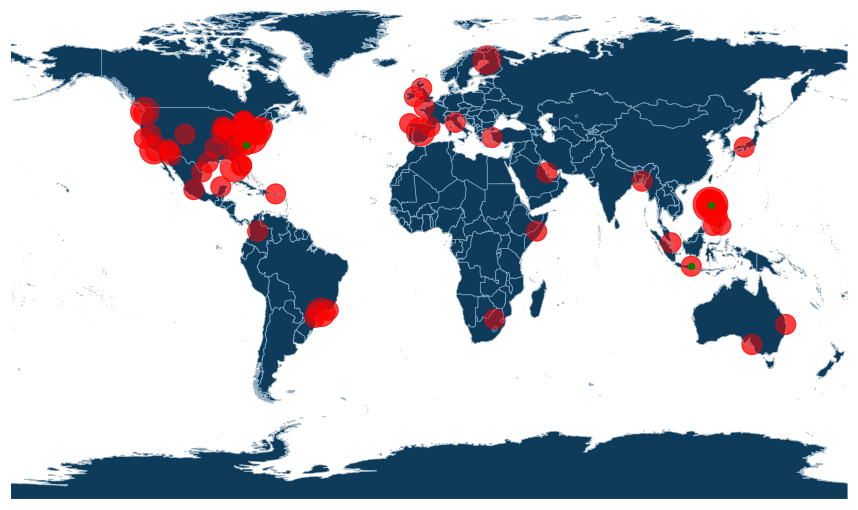

In [402]:
shp_link = './ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp'
shp = ps.open(shp_link)
some = [True for i in ps.open(shp_link)] #bool(rdm.getrandbits(1))


fig = figure(figsize=(15,9))

base = maps.map_poly_shp(shp)
base.set_facecolor('black')
base.set_linewidth(0.75)
base.set_edgecolor('0.8')
some = maps.map_poly_shp(shp, which=some)
some.set_alpha(0.5)
some.set_linewidth(0.)
ptsC = scatter(df1['centroid_lat'], df1['centroid_lon'], s=400*df1['count'], alpha=.5)
ptsC.set_color('red')

pts = scatter(coordinates['latitude'], coordinates['longitude'])
pts.set_color('green')

ax = maps.setup_ax([base, some, ptsC, pts], [shp.bbox, shp.bbox, shp.bbox, shp.bbox])

fig.add_axes(ax)
show()

(2000, 10)

In [403]:
#df.to_csv('dataT.csv', index=False)

In [ ]:
#use the sentiment to color

In [526]:
df['user_description']

0            Have Faith, Hope and Love 😇💕 || Astrophile ✨
1       🇳🇴❤️ I love ivanka trump 🌹🇸🇪 l love you 💕🥀 sor...
2                                                       💑
3         Conservative Veterans wife/born again Christian
4       Society for Cultivation of Sciences and Humani...
5       Sci-fi fan, dinosaur enthusiast, and weeb. Ama...
6                                                    None
7       love food , dogs , President Trump and his fam...
8                                                    None
9                           Entre Sevilla y Gran Canaria.
10      Go NASA!!!Go Barça!!Two different but determin...
11      Socióloga, interesada en generar sinergias ent...
12                                                   None
13                                No boi I have a smile 😊
14      Horses🐎 | Entrepreneurship, Social Development...
15                                                   None
16      Born in Motown/Hockeytown/Dee-troit. Spartan. ...
17      If we 

In [66]:
#dfA = pd.read_csv('dataT.csv')

In [70]:
def Converter(x):
    try:
        return eval(x)
    except:
        None

In [71]:
#dfA['raw_data'] = dfA.apply(lambda x: Converter(x['raw_data']), 1)

In [74]:
#L = list(dfA['raw_data']) + L

In [ ]:
#L = [x for x in L if x]